# ABESS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading our Data

In [3]:
df_no_outliers= pd.read_csv(r"Datasets\no_outliers.csv")
df_no_outliers['fips'] = df_no_outliers['fips'].astype(str).apply(lambda x: x.zfill(5))

In [4]:
from sklearn.preprocessing import StandardScaler, scale
import statsmodels.api as sm

X = df_no_outliers.drop(columns=['fips', 'avg_death_rate'])
X_names = X
y = df_no_outliers['avg_death_rate']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = sm.add_constant(X)

### Example ABESS model with generated data


### Abess model with our data

In [8]:
# load abess example data 
from abess.linear import LinearRegression


In [5]:
col_num = X.shape[1] # get dimension of data
print(col_num)

275


In [9]:

support_size_range = 50
model = LinearRegression(support_size = range(support_size_range))
model.fit(X, y)

LinearRegression(support_size=range(0, 50))

In [11]:
ind = np.nonzero(model.coef_)
print("non-zero:\n", X_names.columns[ind])
print("coef:\n", model.coef_)

non-zero:
 Index(['Unnamed: 0', 'ADI_NATRANK', 'pct_pop_commute_travel_time_60_to_89_min',
       'pct_pop_commutes_by_bicycle', 'pop_commutes_by_bicycle',
       'pop_works_in_state_of_residence',
       'pct_pop_race_hawaiian_pacific_islander', 'pct_pop_sex_female',
       'pop_race_asian', 'pct_pop_works_industry_armed_forces',
       'pop_works_industry_finance_insurance_real_estate',
       'households_with_computing_devices_other_computer',
       'pct_households_cohabiting_couple',
       'pct_households_female_head_with_children', 'pop_sex_male_age_0_to_18'],
      dtype='object')
coef:
 [        nan  0.          0.          0.          0.          0.
  0.          0.00144526  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00104864

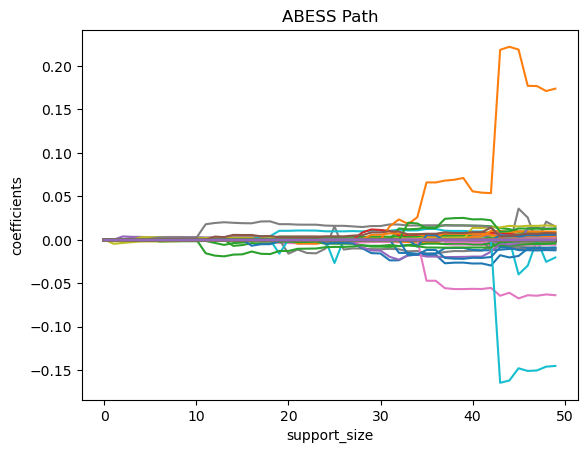

In [12]:
coef = np.zeros((support_size_range, col_num))
ic = np.zeros(support_size_range)
for s in range(support_size_range):
    model = LinearRegression(support_size=s)
    model.fit(X, y)
    coef[s, :] = model.coef_
    ic[s] = model.eval_loss_

for i in range(col_num):
    plt.plot(coef[:, i], label=i)

plt.xlabel('support_size')
plt.ylabel('coefficients')
plt.title('ABESS Path')
plt.show()

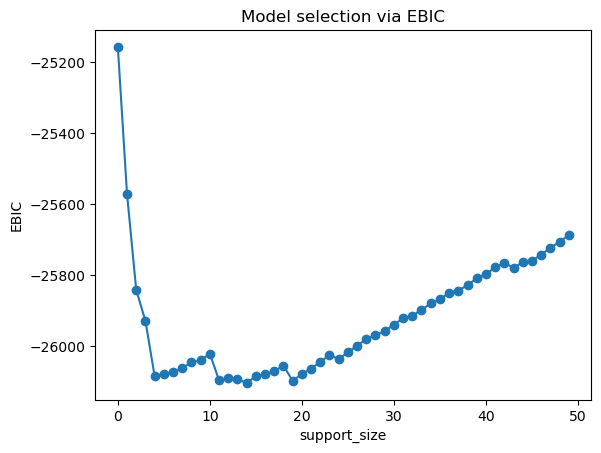

In [13]:
plt.plot(ic, 'o-')
plt.xlabel('support_size')
plt.ylabel('EBIC')
plt.title('Model selection via EBIC')
plt.show()

In [14]:
significant_columns = ['ADI_NATRANK', 'pct_pop_commute_travel_time_60_to_89_min',
       'pct_pop_commutes_by_bicycle', 'pop_commutes_by_bicycle',
       'pop_works_in_state_of_residence',
       'pct_pop_race_hawaiian_pacific_islander', 'pct_pop_sex_female',
       'pop_race_asian', 'pct_pop_works_industry_armed_forces',
       'pop_works_industry_finance_insurance_real_estate',
       'households_with_computing_devices_other_computer',
       'pct_households_cohabiting_couple',
       'pct_households_female_head_with_children', 'pop_sex_male_age_0_to_18']

In [17]:
X = df_no_outliers[significant_columns]
X_names = X
y = df_no_outliers['avg_death_rate']



In [18]:
model_full = sm.OLS(y, X).fit()
print(model_full.summary())

                                 OLS Regression Results                                
Dep. Variable:         avg_death_rate   R-squared (uncentered):                   0.655
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              356.5
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:10:05   Log-Likelihood:                          8237.7
No. Observations:                2643   AIC:                                 -1.645e+04
Df Residuals:                    2629   BIC:                                 -1.637e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---